# Cómo representar gráficamente conjuntos de datos de dibujos en Pictionary

En este bloc de notas de Python, veremos cómo podemos representar los distintos dataset del proyecto de Pictionary. Para ello, realizamos lo siguiente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Tras importar las librerías correspondientes, cargamos los datos relativos a una categoría concreta. Para este ejemplo, usaremos dibujos de gatos (categoría 'cat').

In [2]:
categories = open('categories.txt','r').read().splitlines()
np.random.shuffle(categories)
category = 'cat'
print('Category: ', category)
npz_file = np.load('all_sketches/' + category + '.npz', encoding='latin1', allow_pickle=True)

Category:  cat


Del conjunto de datos de entrenamiento, nos quedamos con los 20 primeros dibujos.

In [3]:
a = np.array(npz_file['train'])[0:20]

Para mostrar un dibujo, preparamos una figura donde haremos un plot continuo de los valores de x e y de cada trazo del dibujo, invirtiendo el eje y para poder observar bien el dibujo.

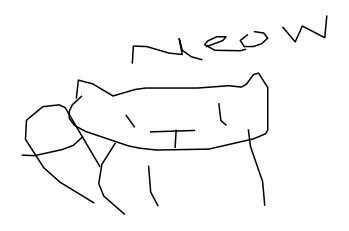

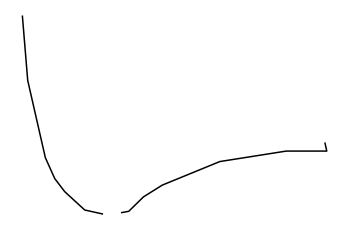

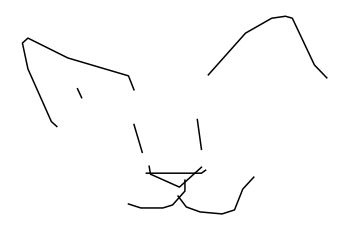

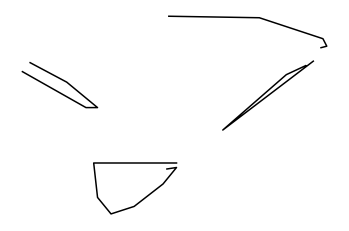

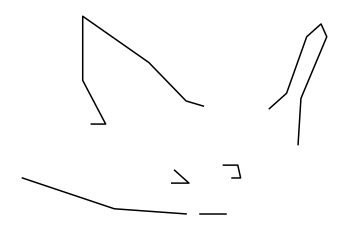

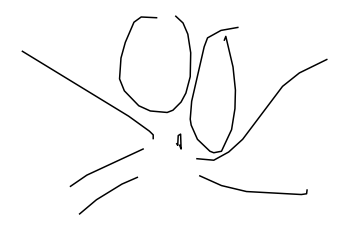

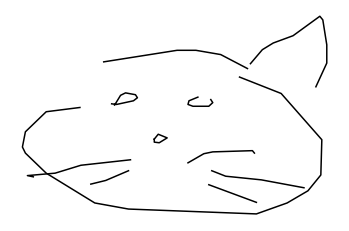

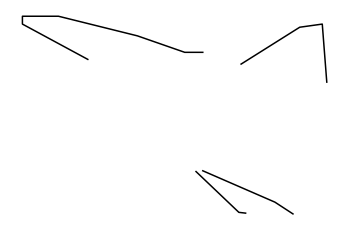

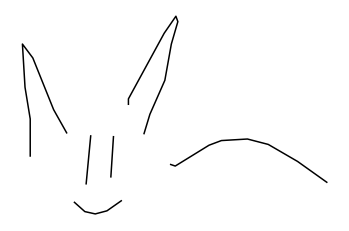

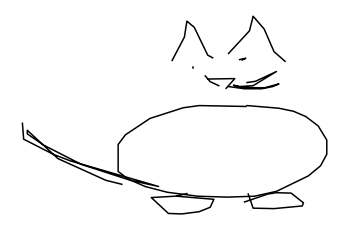

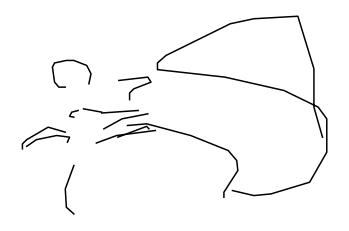

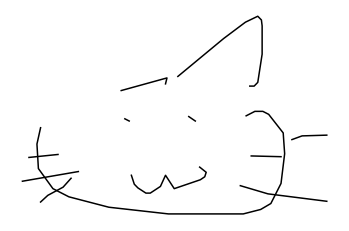

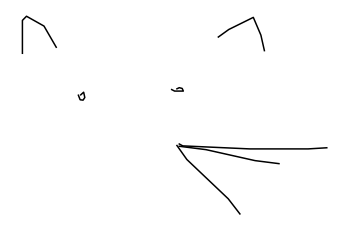

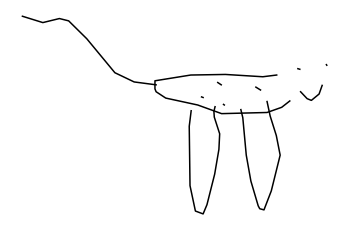

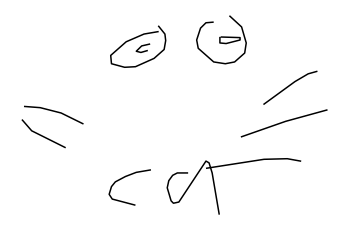

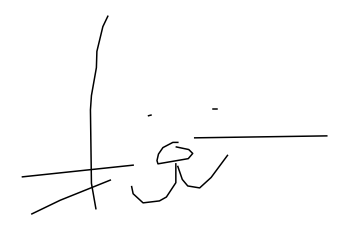

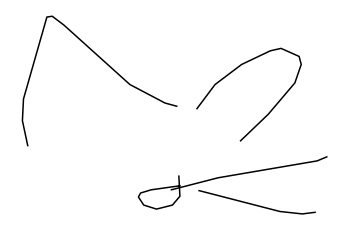

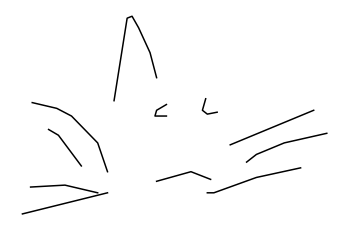

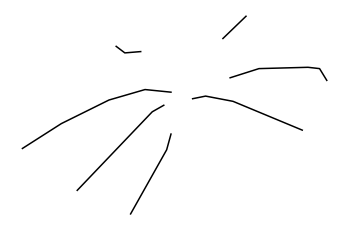

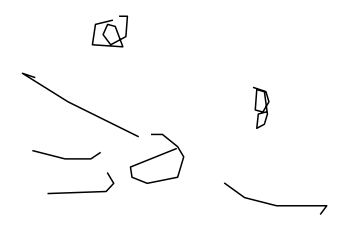

In [6]:
lastI = 0
for j in range(0,20):
    plt.figure()
    plt.axis('off')
    plt.gca().invert_yaxis()
    X = a[j][:,0].copy()
    Y = a[j][:,1].copy()
    T = a[j][:,2].copy()
    for i in range(1,a[j].shape[0]):
        if (T[i-1] == 0): 
            X[i] = X[i] + X[i-1]
            Y[i] = Y[i] + Y[i-1]
        else:
            plt.plot(X[lastI:i],Y[lastI:i],color='black')
            lastI = i
            X[i] = X[i] + X[i-1]
            Y[i] = Y[i] + Y[i-1]